# GraphPlot
## A graph visualization package in Julia
### Han Jihui
### jh@mails.ccnu.edu.cn
### @afternone
### github.com/afternone

# Get Started


# Undirected Graph


In [10]:
# load needed package firstly
using Graphs
using GraphPlot

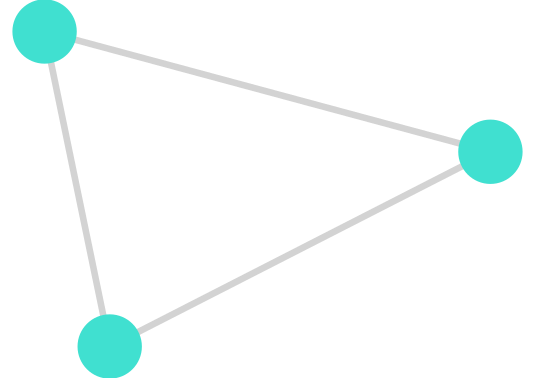

In [11]:
# construct a simple undirected graph
g = simple_graph(3, is_directed=false)
add_edge!(g, 1, 2)
add_edge!(g, 2, 3)
add_edge!(g, 3, 1)
# just plot it
gplot(g) 
# If you are in Julia REPL 
# instead with `gplothtml(g)` to display result in a temp html file

# Directed Graph

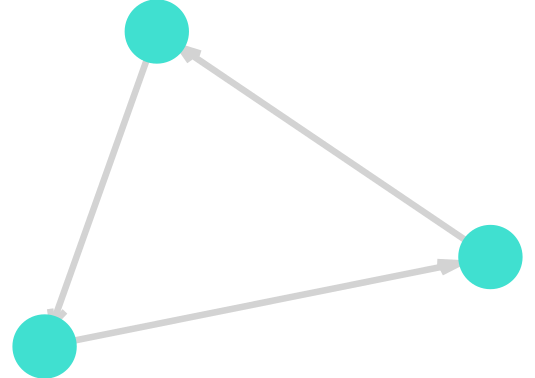

In [53]:
# construct a simple undirected graph
g = simple_graph(3)
add_edge!(g, 1, 2)
add_edge!(g, 2, 3)
add_edge!(g, 3, 1)
# just plot it
gplot(g)

# More Complicated Example

# Karate Network

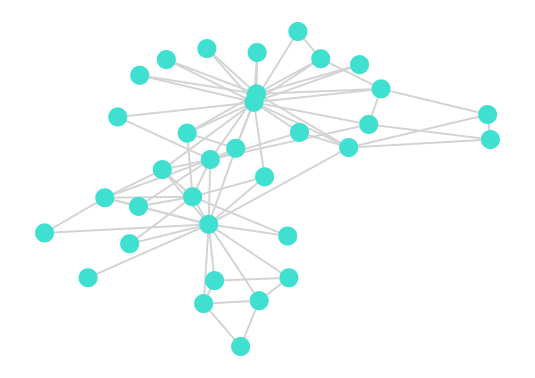

In [12]:
# use graphfamous function to load some famous graphs
g = graphfamous("karate")
gplot(g)

# Add node labels

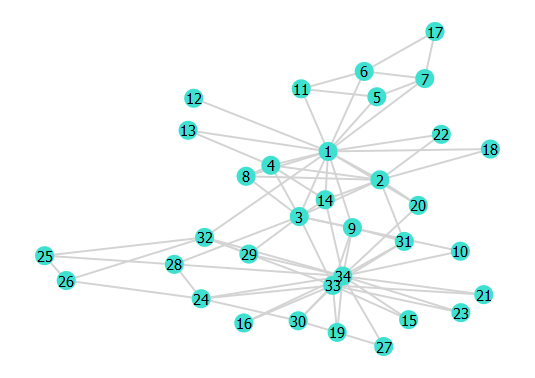

In [13]:
nodelabel = collect(1:num_vertices(g))
gplot(g, nodelabel=nodelabel)

# Control the node and nodelabel size

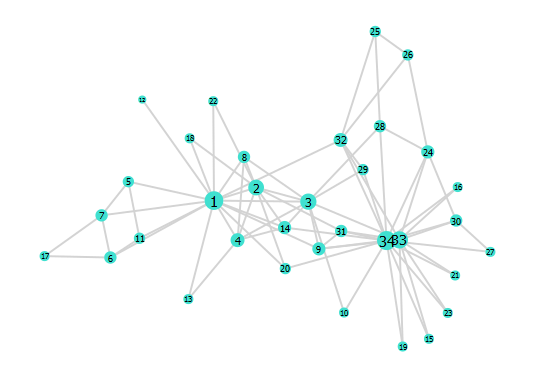

In [35]:
mysize = Float64[out_degree(v, g) for v in vertices(g)]
mysize .^= 0.3 # zoom factor
gplot(g, nodelabel=nodelabel, nodesize=mysize, nodelabelsize=mysize)

# Transparent

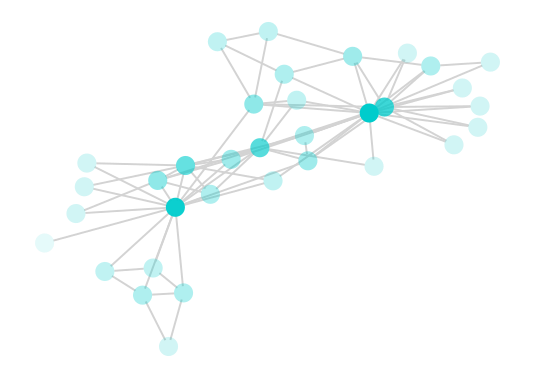

In [39]:
using Colors
# stick out large degree nodes
alphas = mysize/maximum(mysize)
nodefillc = [RGBA(0.0,0.8,0.8,i) for i in alphas]
gplot(g, nodefillc=nodefillc)

# Color the graph

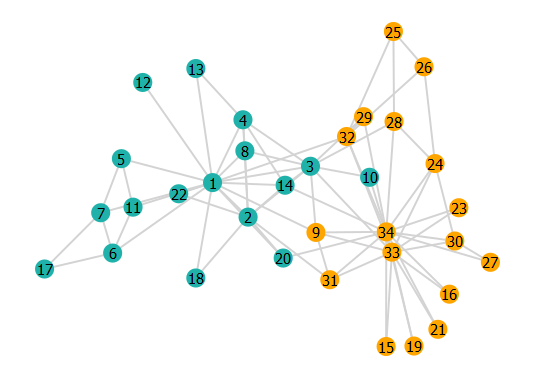

In [42]:
# nodes membership
membership = [1,1,1,1,1,1,1,1,2,1,1,1,1,1,2,2,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2]
nodecolor = [colorant"lightseagreen", colorant"orange"]
# membership color
nodefillc = nodecolor[membership]
gplot(g, nodefillc=nodefillc, nodelabel=nodelabel)

# Different layouts

# Random Layout

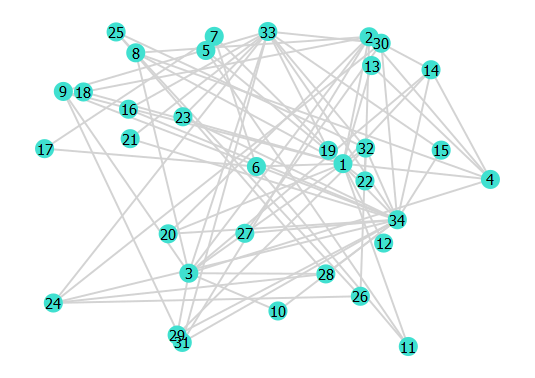

In [43]:
gplot(g, layout=random_layout, nodelabel=nodelabel)

# Circular Layout

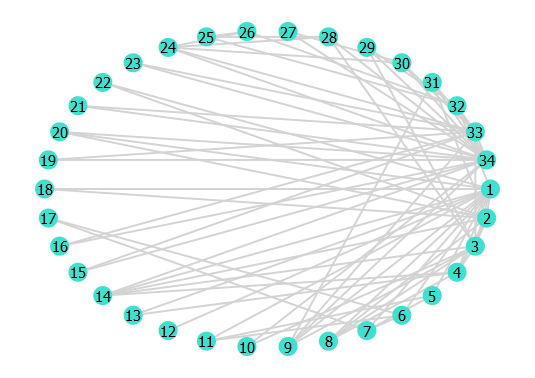

In [44]:
# circular layout
gplot(g, layout=circular_layout, nodelabel=nodelabel)

# Spectral Layout

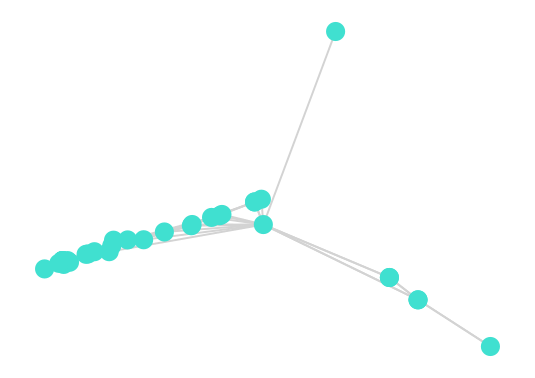

In [45]:
# spectral layout
gplot(g, layout=spectral_layout)

# Shell Layout

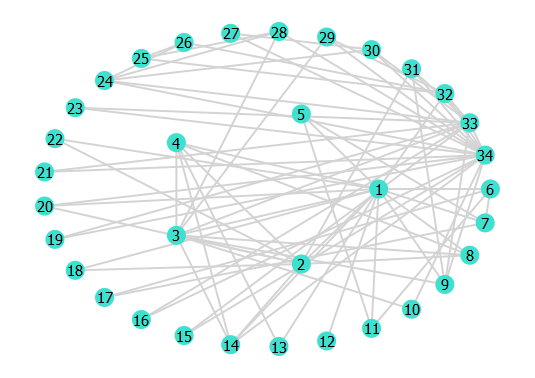

In [47]:
# shell layout
nlist = Array(Vector{Int}, 2) # two shells
nlist[1] = collect(1:5) # first shell
nlist[2] = collect(6:num_vertices(g)) # second shell
locs_x, locs_y = shell_layout(g, nlist)
gplot(g, locs_x, locs_y, nodelabel=nodelabel)

# Curve Edge

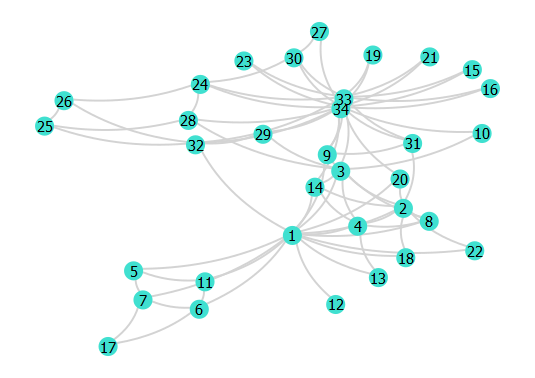

In [52]:
gplot(g, nodelabel=nodelabel, linetype="curve", outangle=π/11)

# Native LightGraphs integration

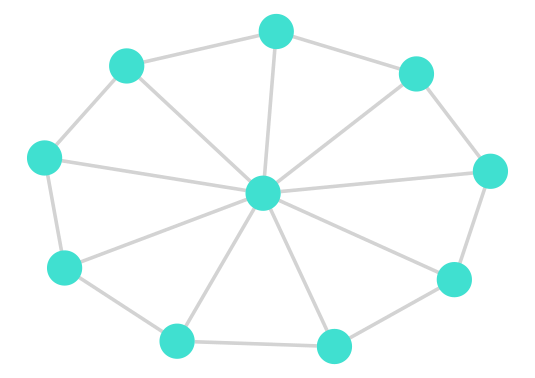

In [50]:
using LightGraphs
h = WheelGraph(10)
gplot(h)

# Save figure to file

In [ ]:
using Compose
# save to pdf
draw(PDF("karate.pdf", 16cm, 16cm), gplot(g))
# save to png
draw(PNG("karate.png", 16cm, 16cm), gplot(g))
# save to svg
draw(SVG("karate.svg", 16cm, 16cm), gplot(g))

# Other graph visualization packages
* [GraphLayout.jl](https://github.com/IainNZ/GraphLayout.jl) - Graph layout and visualization algorithms, implemented in Julia.
* [GraphViz.jl](https://github.com/Keno/GraphViz.jl) - Julia binding to the `GraphViz` library.
* [TikzGraphs.jl](https://github.com/sisl/TikzGraphs.jl) - plot `Graph.jl` graphs using `lualatex/tikz`.

# Thanks
* [Iain Dunning](https://github.com/IainNZ) for `spring` and `stressmajorize` layout algorithms ([GraphLayout.jl](https://github.com/IainNZ/GraphLayout.jl))
* [Daniel C. Jones](https://github.com/dcjones) for [Compose.jl](https://github.com/dcjones/Compose.jl)